# Question 1:
Attach the dataset and mentioned problem statement below,
● A sizable department has to be maintained, for the purposes of recruiting new talent
● More often than not, the new employees have to be trained for the job and/or given time to
acclimatize themselves to the company
● Hence, the management has contracted an HR analytics firm to understand what factors they
should focus on, in order to curb attrition.
● In other words, they want to know what changes they should make to their workplace, in order to
get most of their employees to stay.
● Also, they want to know which of these variables is most important and needs to be addressed
right away.

# Problem Statement A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.


# Real World / Business Objectives and Constraints
==> Interpertablity of the model

==> No Strict Latency requried

==> Model should give results in Probablity


# Data
DATA provided in a CSV file
general_data.csv ==> Employee Information

## Attrition Assignment

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset1 = pd.read_csv("general_data.csv")
dataset1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
dataset1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [4]:
dataset1.isnull()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
dataset1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [6]:
dataset1.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [7]:
dataset3=dataset1[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].describe()
dataset3

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,65029.312925,2.694830,15.209524,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,47068.888559,2.498887,3.659108,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [8]:
dataset3=dataset1[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].median()
dataset3

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [9]:
dataset3=dataset1[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].mode()
dataset3

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,3,23420,1.0,11,10.0,2,5,0,2


In [10]:
dataset3=dataset1[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].var()
dataset3

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.244436e+00
PercentSalaryHike          1.338907e+01
TotalWorkingYears          6.056298e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [11]:
dataset3=dataset1[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].skew()
dataset3

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [12]:
dataset3=dataset1[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].kurt()
dataset3

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

# Inference from the analysis:
 All the above variables show positive skewness; while Age & Mean_distance_from_home are leptokurtic and all other variables are platykurtic.

 The Mean_Monthly_Income’s IQR is at 54K suggesting company wide attrition across all income bands

 Mean age forms a near normal distribution with 13 years of IQR

# Outliers:
There’s no regression found while plotting Age, MonthlyIncome, TotalWorkingYears, YearsAtCompany, etc., on a scatter plot

{'whiskers': [<matplotlib.lines.Line2D at 0x2b1a0a548c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2b1a03f1cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b1a09aac08>],
 'medians': [<matplotlib.lines.Line2D at 0x2b1a03f1d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b1a0a58388>],
 'means': []}

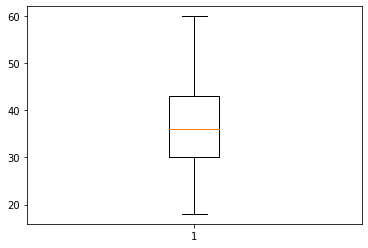

In [13]:
box_plot=dataset1.Age
plt.boxplot(box_plot)

## Age is normally distributed without any outliers## 

{'whiskers': [<matplotlib.lines.Line2D at 0x2b1a0df5188>,
 'caps': [<matplotlib.lines.Line2D at 0x2b1a0ac1b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b1a0e62a88>],
 'medians': [<matplotlib.lines.Line2D at 0x2b1a0e39388>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b1a0e39f08>],
 'means': []}

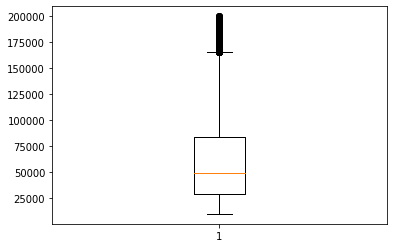

In [14]:
box_plot=dataset1.MonthlyIncome
plt.boxplot(box_plot)

## Monthly Income is Right skewed with several outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2b1a0c47108>,
 'caps': [<matplotlib.lines.Line2D at 0x2b1a0c47f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b1a09dbd08>],
 'medians': [<matplotlib.lines.Line2D at 0x2b1a0447e08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b1a0447348>],
 'means': []}

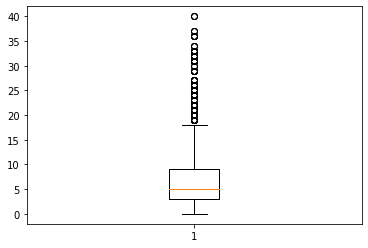

In [15]:
box_plot=dataset1.YearsAtCompany
plt.boxplot(box_plot)

## Years at company is also Right Skewed with several outliers observed.

# EDA
We will cover how to visually analyze:

⚫ Numerical variables with histograms,

⚫ Categorical variables with count plots,

⚫ Relationships between numerical variables with scatter plots, joint plots, and pair plots, and

⚫ Relationships between numerical and categorical variables with box-and-whisker plots and complex conditional plots.

# UniVarinat Analysis

For all columns ploting countplots


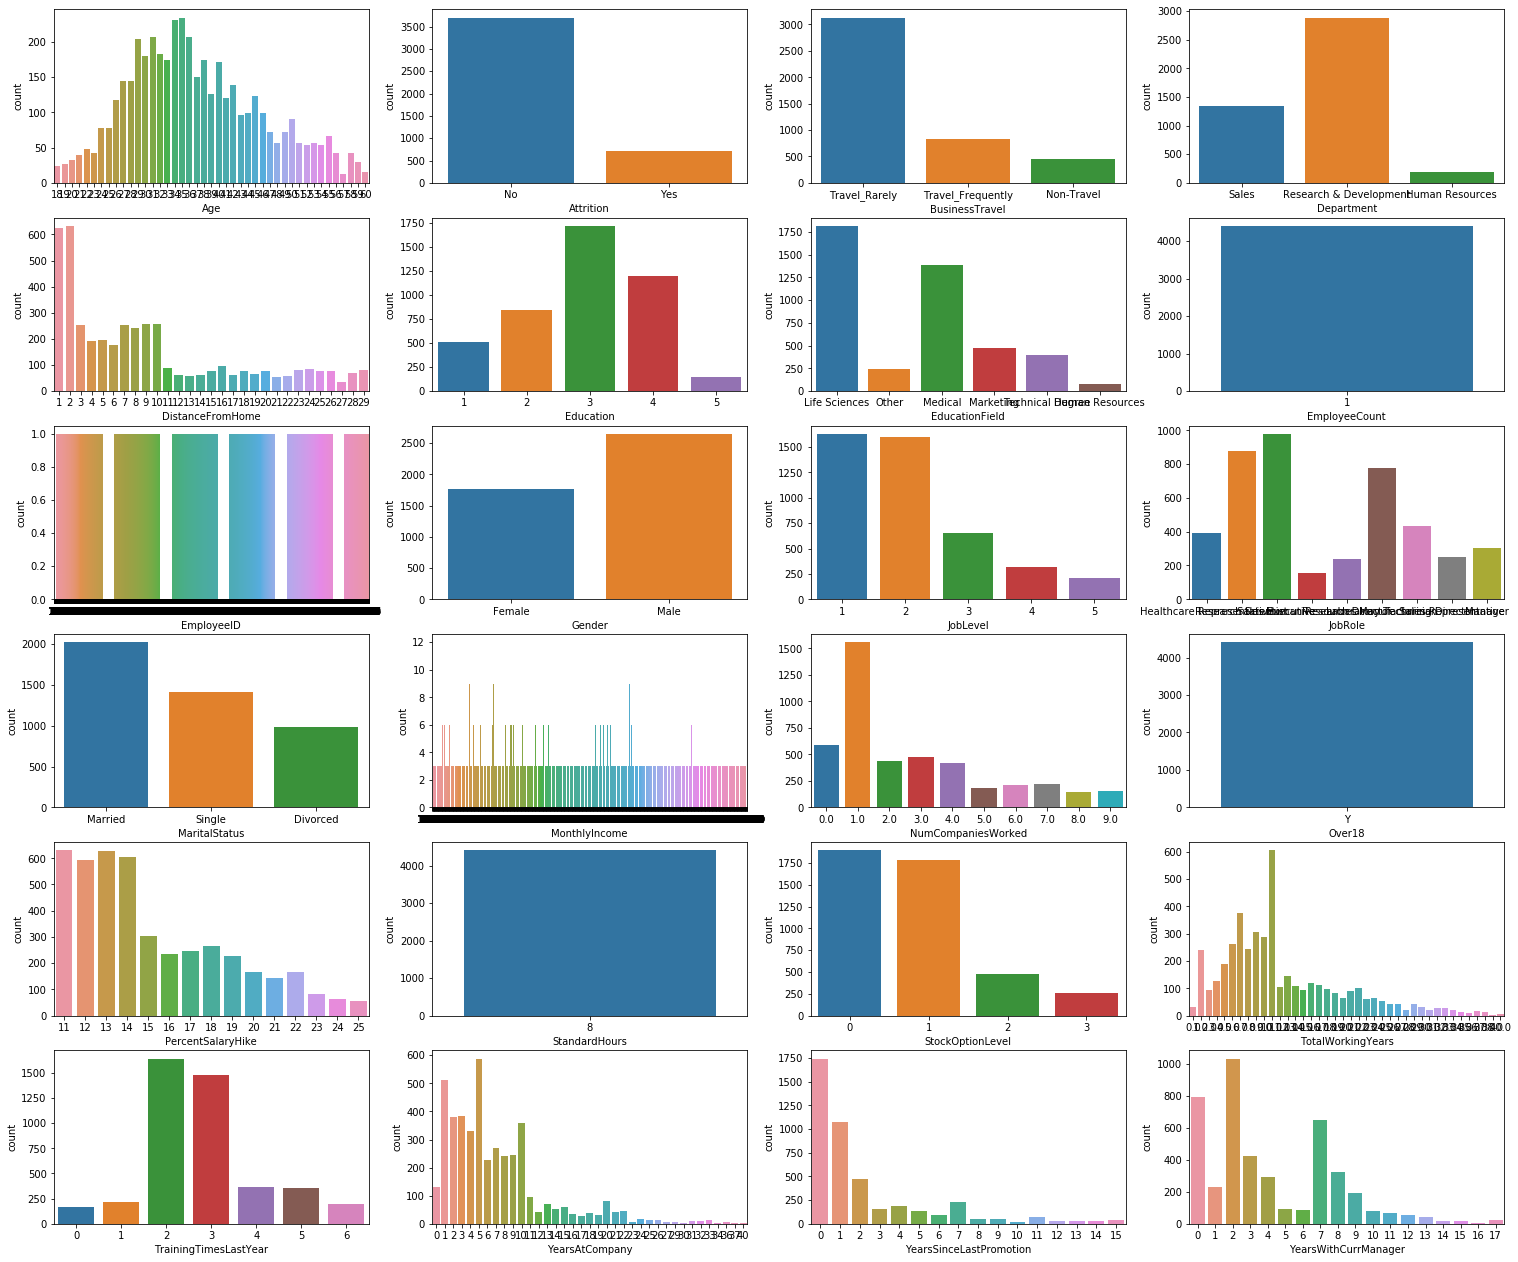

In [21]:
#For all columns doing countplots
fig = plt.figure(figsize=(26,30))
for idx,i in enumerate(dataset1.columns.tolist()):
    ax=plt.subplot(8,4,idx+1)
    sns.countplot(x=i,data=dataset1,ax=ax)
plt.show()

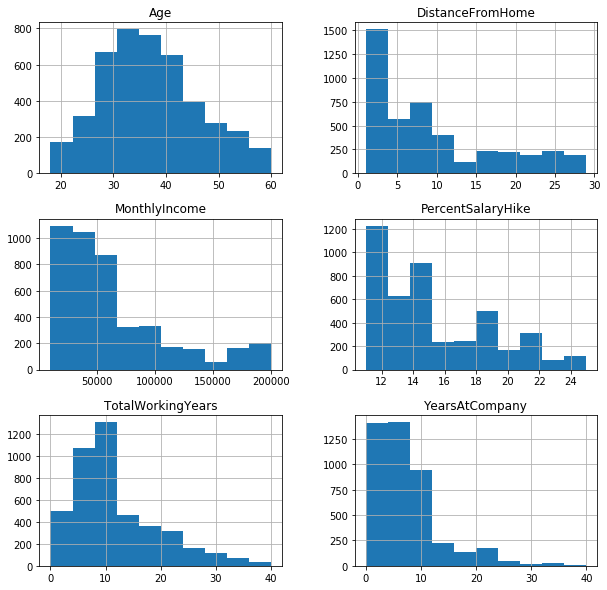

In [23]:
#Divide into NumericalColumns
columns=dataset1.columns.tolist()
num_col_eda=['Age','DistanceFromHome','PercentSalaryHike','MonthlyIncome','TotalWorkingYears','YearsAtCompany']
dataset1[num_col_eda].hist(figsize=(10,10))
plt.show()

## Output ::

⚫ Key Observation from Above Plot are

⚫ Except Age most of the Columns are in Skew Distribistion form

⚫ Age Feature Distribution is almost Normal Distribution

⚫ As logistic regression does not require independent variables to be normal distributed .so i am not changing distribution of features which are skewed into the normal Distribution